In [1]:
.libPaths("/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library")

In [2]:
setwd("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result")

In [16]:
#预期应是overlap较多
library(VennDiagram)
library(colorspace)
library(ggplot2)
colors=c("#840dd3","#04c49c","#2759bd")

In [48]:
all_rows <- data.frame()
for(ad_filter_idx in c(1,2,3)){
    for(dp_filter_idx in c(3,4,5,6,7,8,9,10)){
        input_res_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW16_1_4/GABAergic_neurons/SPRINT_identified_all.res",header=F)
        input_res_19 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW19_1_1/GABAergic_neurons/SPRINT_identified_all.res",header=F)
        input_res_23 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW23_1_2/GABAergic_neurons/SPRINT_identified_all.res",header=F)
        input_res_26 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW26_1_1/GABAergic_neurons/SPRINT_identified_all.res",header=F)

        all_input_res <- rbind(input_res_16,input_res_19)
        all_input_res <- rbind(all_input_res,input_res_23)
        all_input_res <- rbind(all_input_res,input_res_26)
        #对res的dp和ad做一定过滤
        filtered_idx <- c()

        for(i in 1:nrow(all_input_res)){
            tmp_ad = as.numeric(strsplit(all_input_res[i,7],":")[[1]][1])
            tmp_dp = as.numeric(strsplit(all_input_res[i,7],":")[[1]][2])
            if(tmp_ad > ad_filter_idx & tmp_dp > dp_filter_idx){
                filtered_idx <- c(filtered_idx,i)
            }
        }
        res_all <- paste0(all_input_res[,1],"_",all_input_res[,3])
        sub_res_all_GABA <- unique(res_all[filtered_idx])

        #neuron
        #neuron
        input_res_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW16_1_4/Neurons/SPRINT_identified_all.res",header=F)
        input_res_19 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW19_1_1/Neurons/SPRINT_identified_all.res",header=F)
        input_res_23 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW23_1_2/Neurons/SPRINT_identified_all.res",header=F)
        input_res_26 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW26_1_1/Neurons/SPRINT_identified_all.res",header=F)

        all_input_res <- rbind(input_res_16,input_res_19)
        all_input_res <- rbind(all_input_res,input_res_23)
        all_input_res <- rbind(all_input_res,input_res_26)
        #对res的dp和ad做一定过滤
        filtered_idx <- c()

        for(i in 1:nrow(all_input_res)){
            tmp_ad = as.numeric(strsplit(all_input_res[i,7],":")[[1]][1])
            tmp_dp = as.numeric(strsplit(all_input_res[i,7],":")[[1]][2])
            if(tmp_ad > ad_filter_idx & tmp_dp > dp_filter_idx){
                filtered_idx <- c(filtered_idx,i)
            }
        }
        res_all <- paste0(all_input_res[,1],"_",all_input_res[,3])
        sub_res_all_neuron <- unique(res_all[filtered_idx])

        #opc
        input_res_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW16_1_4/OPC/SPRINT_identified_all.res",header=F)
        input_res_19 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW19_1_1/OPC/SPRINT_identified_all.res",header=F)
        input_res_23 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW23_1_2/OPC/SPRINT_identified_all.res",header=F)
        input_res_26 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW26_1_1/OPC/SPRINT_identified_all.res",header=F)

        all_input_res <- rbind(input_res_16,input_res_19)
        all_input_res <- rbind(all_input_res,input_res_23)
        all_input_res <- rbind(all_input_res,input_res_26)
        #对res的dp和ad做一定过滤
        filtered_idx <- c()

        for(i in 1:nrow(all_input_res)){
            tmp_ad = as.numeric(strsplit(all_input_res[i,7],":")[[1]][1])
            tmp_dp = as.numeric(strsplit(all_input_res[i,7],":")[[1]][2])
            if(tmp_ad > ad_filter_idx & tmp_dp > dp_filter_idx){
                filtered_idx <- c(filtered_idx,i)
            }
        }
        res_all <- paste0(all_input_res[,1],"_",all_input_res[,3])
        sub_res_all_opc <- unique(res_all[filtered_idx])

        neuron_GABA_inter_GABA_prop <- length(intersect(sub_res_all_GABA,sub_res_all_neuron))/length(sub_res_all_GABA)
        neuron_GABA_inter_neuron_prop <- length(intersect(sub_res_all_GABA,sub_res_all_neuron))/length(sub_res_all_neuron)
        opc_GABA_inter_GABA_prop <- length(intersect(sub_res_all_GABA,sub_res_all_opc))/length(sub_res_all_GABA)
        opc_GABA_inter_opc_prop <- length(intersect(sub_res_all_GABA,sub_res_all_opc))/length(sub_res_all_opc)
        opc_neuron_inter_neuron_prop <- length(intersect(sub_res_all_neuron,sub_res_all_opc))/length(sub_res_all_neuron)
        opc_neuron_inter_opc_prop <- length(intersect(sub_res_all_neuron,sub_res_all_opc))/length(sub_res_all_opc)

        this_row <- c(paste0(ad_filter_idx,'_',dp_filter_idx),neuron_GABA_inter_GABA_prop,neuron_GABA_inter_neuron_prop,
                    opc_GABA_inter_GABA_prop,opc_GABA_inter_opc_prop,opc_neuron_inter_neuron_prop,opc_neuron_inter_opc_prop)
        all_rows <- rbind(all_rows,this_row)

        venn.diagram(
            x = list(
            "GABA_neurons" = sub_res_all_GABA,
            #"18" = res_dat2[[one]],
            "Neurons" = sub_res_all_neuron,
            #"22" = res_dat4[[one]],
            "OPC" = sub_res_all_opc
            ),
            filename = paste0("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_overlap/res_overlap_3celltypes_",ad_filter_idx,"_",dp_filter_idx,".jpeg"),
            col = colors,
            cat.col = colors,
            cat.dist = c(0.08,0.08,0.08),
            cat.pos = c(11,1,6),
            cex = 1.3
        )
    }
}

[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GABA and neuron"
[1] "GABA and OPC"
[1] "neuron and OPC"
[1] "GAB

In [52]:
rownames(all_rows) <- paste0(all_rows[,1],"_",all_rows[,2])

,X0,X0.1,X0.124152683474717,X0.116638033426656,X0.0346376787054753,X0.149155425932677,X0.0354150759311105,X0.162328350953943
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0_0,0,0,0.12415268,0.11663803,0.03463768,0.14915543,0.03541508,0.16232835
0_1,0,1,0.15128395,0.11636591,0.03636195,0.16774838,0.03285668,0.19706155
0_2,0,2,0.11681692,0.08902493,0.02839806,0.12873985,0.02594028,0.15430967
0_3,0,3,0.09104819,0.06901278,0.02299774,0.10071748,0.02111034,0.12197103
0_4,0,4,0.07239133,0.05439517,0.01792372,0.07883593,0.01646939,0.09640508
0_5,0,5,0.05619684,0.04160703,0.01308958,0.05902129,0.01241055,0.07558212


In [53]:
all_rows <- all_rows[,-c(1,2)]

In [55]:
write.table(all_rows,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_stats/res_overlap_accordToAdDp.txt",quote=F,col.names=F,sep='\t')

In [ ]:
        print("GABA and neuron")
        neuron_GABA_inter_GABA_prop <- length(intersect(sub_res_all_GABA,sub_res_all_neuron))/length(sub_res_all_GABA)
        neuron_GABA_inter_neuron_prop <- length(intersect(sub_res_all_GABA,sub_res_all_neuron))/length(sub_res_all_neuron)
        print("GABA and OPC")
        opc_GABA_inter_GABA_prop <- length(intersect(sub_res_all_GABA,sub_res_all_opc))/length(sub_res_all_GABA)
        opc_GABA_inter_opc_prop <- length(intersect(sub_res_all_GABA,sub_res_all_opc))/length(sub_res_all_opc)
        print("neuron and OPC")
        opc_neuron_inter_neuron_prop <- length(intersect(sub_res_all_neuron,sub_res_all_opc))/length(sub_res_all_neuron)
        opc_neuron_inter_opc_prop <- length(intersect(sub_res_all_neuron,sub_res_all_opc))/length(sub_res_all_opc)

        this_row <- c(ad_filter_idx,dp_filter_idx,neuron_GABA_inter_GABA_prop,neuron_GABA_inter_neuron_prop,
                    opc_GABA_inter_GABA_prop,opc_GABA_inter_opc_prop,opc_neuron_inter_neuron_prop,opc_neuron_inter_opc_prop)
        all_rows <- rbind(all_rows,this_row)

In [27]:
#GABA
input_res_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW16_1_4/GABAergic_neurons/SPRINT_identified_all.res",header=F)
input_res_19 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW19_1_1/GABAergic_neurons/SPRINT_identified_all.res",header=F)
input_res_23 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW23_1_2/GABAergic_neurons/SPRINT_identified_all.res",header=F)
input_res_26 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW26_1_1/GABAergic_neurons/SPRINT_identified_all.res",header=F)

all_input_res <- rbind(input_res_16,input_res_19)
all_input_res <- rbind(all_input_res,input_res_23)
all_input_res <- rbind(all_input_res,input_res_26)
#对res的dp和ad做一定过滤
ad_filter_idx = 3
dp_filter_idx = 10
filtered_idx <- c()

for(i in 1:nrow(all_input_res)){
    tmp_ad = strsplit(all_input_res[i,7],":")[[1]][1]
    tmp_dp = strsplit(all_input_res[i,7],":")[[1]][2]
    if(tmp_ad > ad_filter_idx & tmp_dp > dp_filter_idx){
        filtered_idx <- c(filtered_idx,i)
    }
}
res_all <- paste0(all_input_res[,1],"_",all_input_res[,3])
sub_res_all_GABA <- unique(res_all[filtered_idx])

[1] 47281

In [29]:
#neuron
input_res_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW16_1_4/Neurons/SPRINT_identified_all.res",header=F)
input_res_19 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW19_1_1/Neurons/SPRINT_identified_all.res",header=F)
input_res_23 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW23_1_2/Neurons/SPRINT_identified_all.res",header=F)
input_res_26 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW26_1_1/Neurons/SPRINT_identified_all.res",header=F)

all_input_res <- rbind(input_res_16,input_res_19)
all_input_res <- rbind(all_input_res,input_res_23)
all_input_res <- rbind(all_input_res,input_res_26)
#对res的dp和ad做一定过滤
ad_filter_idx = 3
dp_filter_idx = 10
filtered_idx <- c()

for(i in 1:nrow(all_input_res)){
    tmp_ad = strsplit(all_input_res[i,7],":")[[1]][1]
    tmp_dp = strsplit(all_input_res[i,7],":")[[1]][2]
    if(tmp_ad > ad_filter_idx & tmp_dp > dp_filter_idx){
        filtered_idx <- c(filtered_idx,i)
    }
}
res_all <- paste0(all_input_res[,1],"_",all_input_res[,3])
sub_res_all_neuron <- unique(res_all[filtered_idx])

In [30]:
#opc
input_res_16 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW16_1_4/OPC/SPRINT_identified_all.res",header=F)
input_res_19 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW19_1_1/OPC/SPRINT_identified_all.res",header=F)
input_res_23 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW23_1_2/OPC/SPRINT_identified_all.res",header=F)
input_res_26 <- read.table("/disk1/wenqing/tmp_data/PFC_s2/result/GW26_1_1/OPC/SPRINT_identified_all.res",header=F)

all_input_res <- rbind(input_res_16,input_res_19)
all_input_res <- rbind(all_input_res,input_res_23)
all_input_res <- rbind(all_input_res,input_res_26)
#对res的dp和ad做一定过滤
ad_filter_idx = 3
dp_filter_idx = 10
filtered_idx <- c()

for(i in 1:nrow(all_input_res)){
    tmp_ad = strsplit(all_input_res[i,7],":")[[1]][1]
    tmp_dp = strsplit(all_input_res[i,7],":")[[1]][2]
    if(tmp_ad > ad_filter_idx & tmp_dp > dp_filter_idx){
        filtered_idx <- c(filtered_idx,i)
    }
}
res_all <- paste0(all_input_res[,1],"_",all_input_res[,3])
sub_res_all_opc <- unique(res_all[filtered_idx])

In [31]:
length(sub_res_all_GABA)
length(sub_res_all_neuron)
length(sub_res_all_opc)


[1] 47281

[1] 61321

[1] 10852

In [28]:
all_row <- data.frame()
for(ad_filter_idx in c(3,4,5,6,7,8,9,10)){
    for(dp_filter_idx in c(11,12,13,14,15,16,17,18,19,20)){
        for(celltype in c("GABA","neuron","opc")){
            res_stat <- read.table(paste0("/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_stats/result/",ad_filter_idx,"_",dp_filter_idx,"_",celltype,"_all.res.txt"))
            #this_row <- c(celltype,paste0(ad_filter_idx,"_",dp_filter_idx),res_stat[13,3],res_stat[6,3]+res_stat[7,3])
            this_row <- c(celltype,paste0(ad_filter_idx,"_",dp_filter_idx),res_stat[13,2],res_stat[14,2])
            all_row <- rbind(all_row,this_row)
        }
    }
}

In [29]:
#colnames(all_row) <- c('celltype','ad_dp','AG_TC','CT_GA')
colnames(all_row) <- c('celltype','ad_dp','AG_TC_num','Total_res_num')

In [25]:
write.table(all_row,"/disk1/wenqing/tmp_data/PFC_s2/all_analysis_result/res_stats/result/res_stats_accordToAdDp.txt",quote=F,sep='\t',row.names=F)

In [1]:
df_long <- reshape2::melt(all_row, id.vars = c("celltype", "ad_dp"))

ERROR: Error in eval(expr, envir, enclos): object 'all_row' not found


In [31]:
# ... 上述代码保持不变 ...

# 在绘制图形之前，先对ad_dp进行排序
df_long$ad_dp <- factor(df_long$ad_dp, levels = unique(all_row[,2]), ordered = TRUE)
df_long$value <- as.numeric(df_long$value)
# 指定颜色
#colors <- c("AG_TC" = "#840dd3","CT_GA" = "#04c49c") # 自定义颜色，这里举例红色和蓝色
colors <- c("AG_TC_num" = "#840dd3","Total_res_num" = "#04c49c")


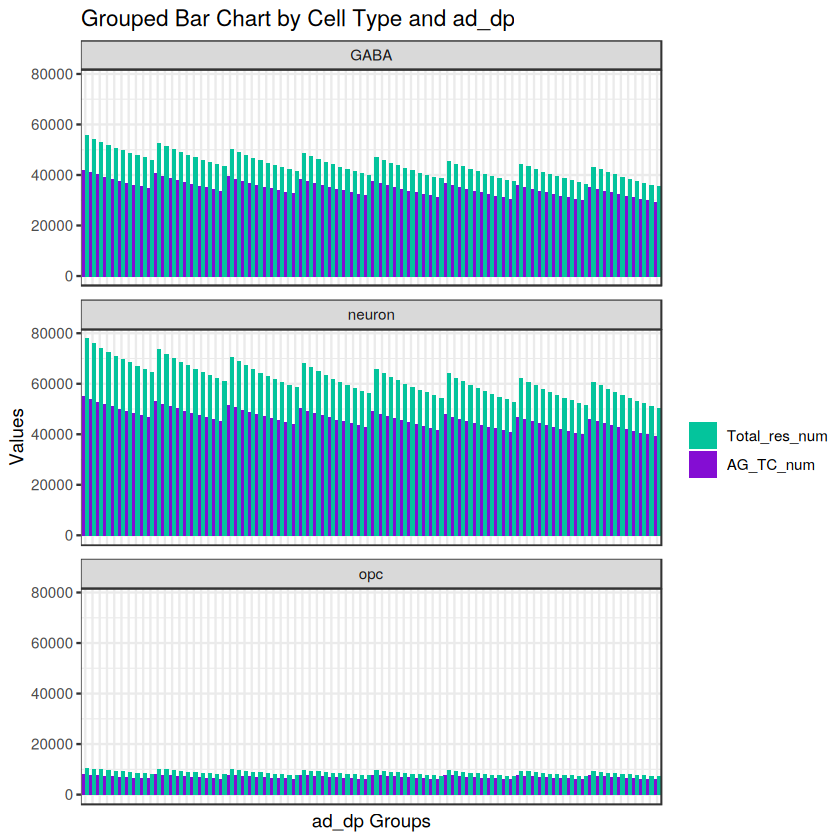

In [32]:

# 使用ggplot2绘制分组柱状图，加入颜色指定
ggplot(df_long, aes(x = ad_dp, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = colors) + # 指定颜色
  facet_wrap(~ celltype, ncol = 1, scales = "free_x") +
  labs(title = "Grouped Bar Chart by Cell Type and ad_dp",
       x = "ad_dp Groups", y = "Values", fill = "") +
  theme_bw() +
  theme(
        axis.text.x = element_blank(),  # 移除x轴的刻度标签
        axis.ticks.x = element_blank()) +
  guides(fill = guide_legend(reverse = TRUE)) # 如果需要按特定顺序显示图例，可以调整这里